# Collaboration and Competition

---


### 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
from agents import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe", no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
n_agents = len(env_info.agents)
print('Number of agents:', n_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Traing Agents using Multi-agent DDPG algorithm


In [5]:
def ddpg(n_episodes=5000, max_t=1500):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                 # get the current state (for each agent)
        agent.reset()                                         # reset the agent noise
        score = np.zeros(n_agents)                           # initialize the score (for each agent)
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]            # send all actions to tne environment
            next_states = env_info.vector_observations          # get next states
            rewards = env_info.rewards                       # get reward
            dones = env_info.local_done                         # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards                           # update the score 
            if np.any(dones):
                break 
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        
        if i_episode % 100 == 0:
            print('\nEpisode {}\tAverage Score: {:.2f}\tMax score: {:.2f}'.format(i_episode, np.mean(scores_deque), np.max(score)), end="")
        if np.mean(scores_deque) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'actor.pth')
            torch.save(agent.critic_local.state_dict(), 'critic.pth')  
            break 
    return scores

params = {
"BUFFER_SIZE":int(1e6),  # replay buffer size
"BATCH_SIZE":512,       # minibatch size
"GAMMA":0.99,            # discount factor
"TAU":0.01,              # for soft update of target parameters
"LR_ACTOR":0.0001,         # learning rate of the actor 
"LR_CRITIC":0.001,        # learning rate of the critic
"WEIGHT_DECAY":0,      # L2 weight decay
"UPDATE_STEP":4,         # specify updates delay
"N_UPDATES":1          #specify no. of updates per update cycle
}

agent = Agent(n = 2, state_size=24, action_size=2, random_seed=42, params=params)
scores = ddpg()


Episode 100	Average Score: 0.00	Max score: 0.00
Episode 200	Average Score: 0.00	Max score: 0.00
Episode 300	Average Score: 0.00	Max score: 0.10
Episode 400	Average Score: 0.02	Max score: 0.10
Episode 500	Average Score: 0.02	Max score: 0.09
Episode 600	Average Score: 0.04	Max score: 0.00
Episode 700	Average Score: 0.04	Max score: 0.20
Episode 800	Average Score: 0.18	Max score: 2.60
Environment solved in 835 episodes!	Average Score: 0.50


In [ ]:
# Calculate moving average with 100 window size
cum_score = []

for i in range(1,min(len(scores), 100)):
    cum_score.append(np.mean(scores[:i]))
    
for i in range(100, len(scores)):
    cum_score.append(np.mean(scores[i-100:i]))

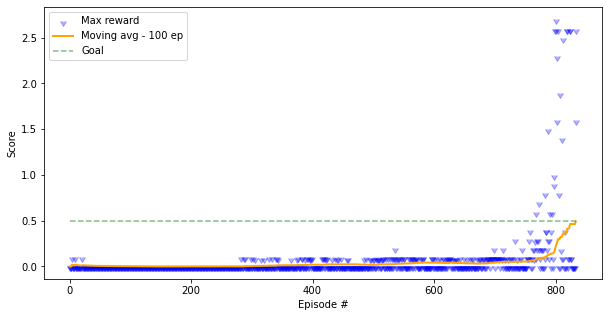

In [33]:
#plot scores
fig = plt.figure(figsize=(10,5))
plt.plot(scores, 'b+', alpha = 0.3, marker=11)
plt.plot(cum_score, color='orange', linewidth=2)
plt.plot(np.linspace(0, len(scores), len(scores)+1), np.ones(len(scores)+1) * 0.5,'g--', alpha =0.5)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(["Max reward", "Moving avg - 100 ep", "Goal"])
plt.show()

When finished, you can close the environment.

In [7]:
env.close()